In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('processed_data/train_features.csv')

In [3]:
df['label'] = df['label'].astype('int')-1

In [4]:
df = df[:100]

In [5]:
df

,ch1_wl,ch1_mav,ch1_ssc,ch1_zc,ch1_var,ch1_rms,ch1_mf,ch1_pf,ch1_activity,ch1_mobility,...,ch4_zc,ch4_var,ch4_rms,ch4_mf,ch4_pf,ch4_activity,ch4_mobility,ch4_complexity,ch4_bp,label
0,1771.171829,2856.676753,394.0,108.0,2.090494e+07,4572.193081,93.878220,101.56250,2.090494e+07,0.658932,...,129.0,5.292122e+06,2300.485130,70.844823,50.78125,5.292122e+06,0.673428,1.086598,1.066494e+07,0
1,14897.738439,16303.247034,320.0,229.0,5.258311e+08,22931.177332,237.728162,238.28125,5.258311e+08,0.765532,...,164.0,2.927003e+08,17108.734586,36.681424,62.50000,2.927003e+08,0.386685,0.725502,5.110866e+07,2
2,3345.050764,8883.969835,444.0,99.0,5.956264e+08,24405.460258,33.513125,31.25000,5.956264e+08,0.289256,...,60.0,5.388652e+09,73407.442405,31.045075,35.15625,5.388652e+09,0.228126,0.442768,8.666772e+09,1
3,756.216943,1806.365095,409.0,99.0,9.676177e+06,3110.659423,37.123395,35.15625,9.676177e+06,0.397913,...,70.0,3.816347e+07,6177.659640,36.965889,31.25000,3.816347e+07,0.313002,0.701886,6.441944e+07,2
4,1094.900863,2163.169242,422.0,94.0,1.039658e+07,3224.373246,45.687026,46.87500,1.039658e+07,0.521728,...,87.0,1.109697e+07,3331.211497,33.056264,35.15625,1.109697e+07,0.386112,0.965219,1.928829e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6851.431346,9693.054071,413.0,139.0,2.621729e+08,16191.878951,96.849310,93.75000,2.621729e+08,0.710102,...,110.0,6.804405e+07,8249.007284,63.111036,46.87500,6.804405e+07,0.630991,1.014060,1.211620e+08,1
96,1802.545064,7026.034999,449.0,64.0,1.934764e+08,13909.577757,30.674217,31.25000,1.934764e+08,0.250197,...,69.0,3.489211e+07,5906.954537,22.386468,23.43750,3.489211e+07,0.224861,0.674387,5.472899e+07,1
97,6244.302386,19090.014896,446.0,82.0,3.219865e+09,56743.855920,36.103713,31.25000,3.219865e+09,0.379225,...,69.0,1.218088e+11,349011.215653,38.892647,42.96875,1.218088e+11,0.314724,0.596791,2.436852e+11,2
98,2474.204714,4847.870647,446.0,98.0,6.449746e+07,8031.051139,46.429109,27.34375,6.449746e+07,0.479067,...,110.0,5.710855e+06,2389.740330,47.598937,23.43750,5.710855e+06,0.480442,0.872988,1.041532e+07,1


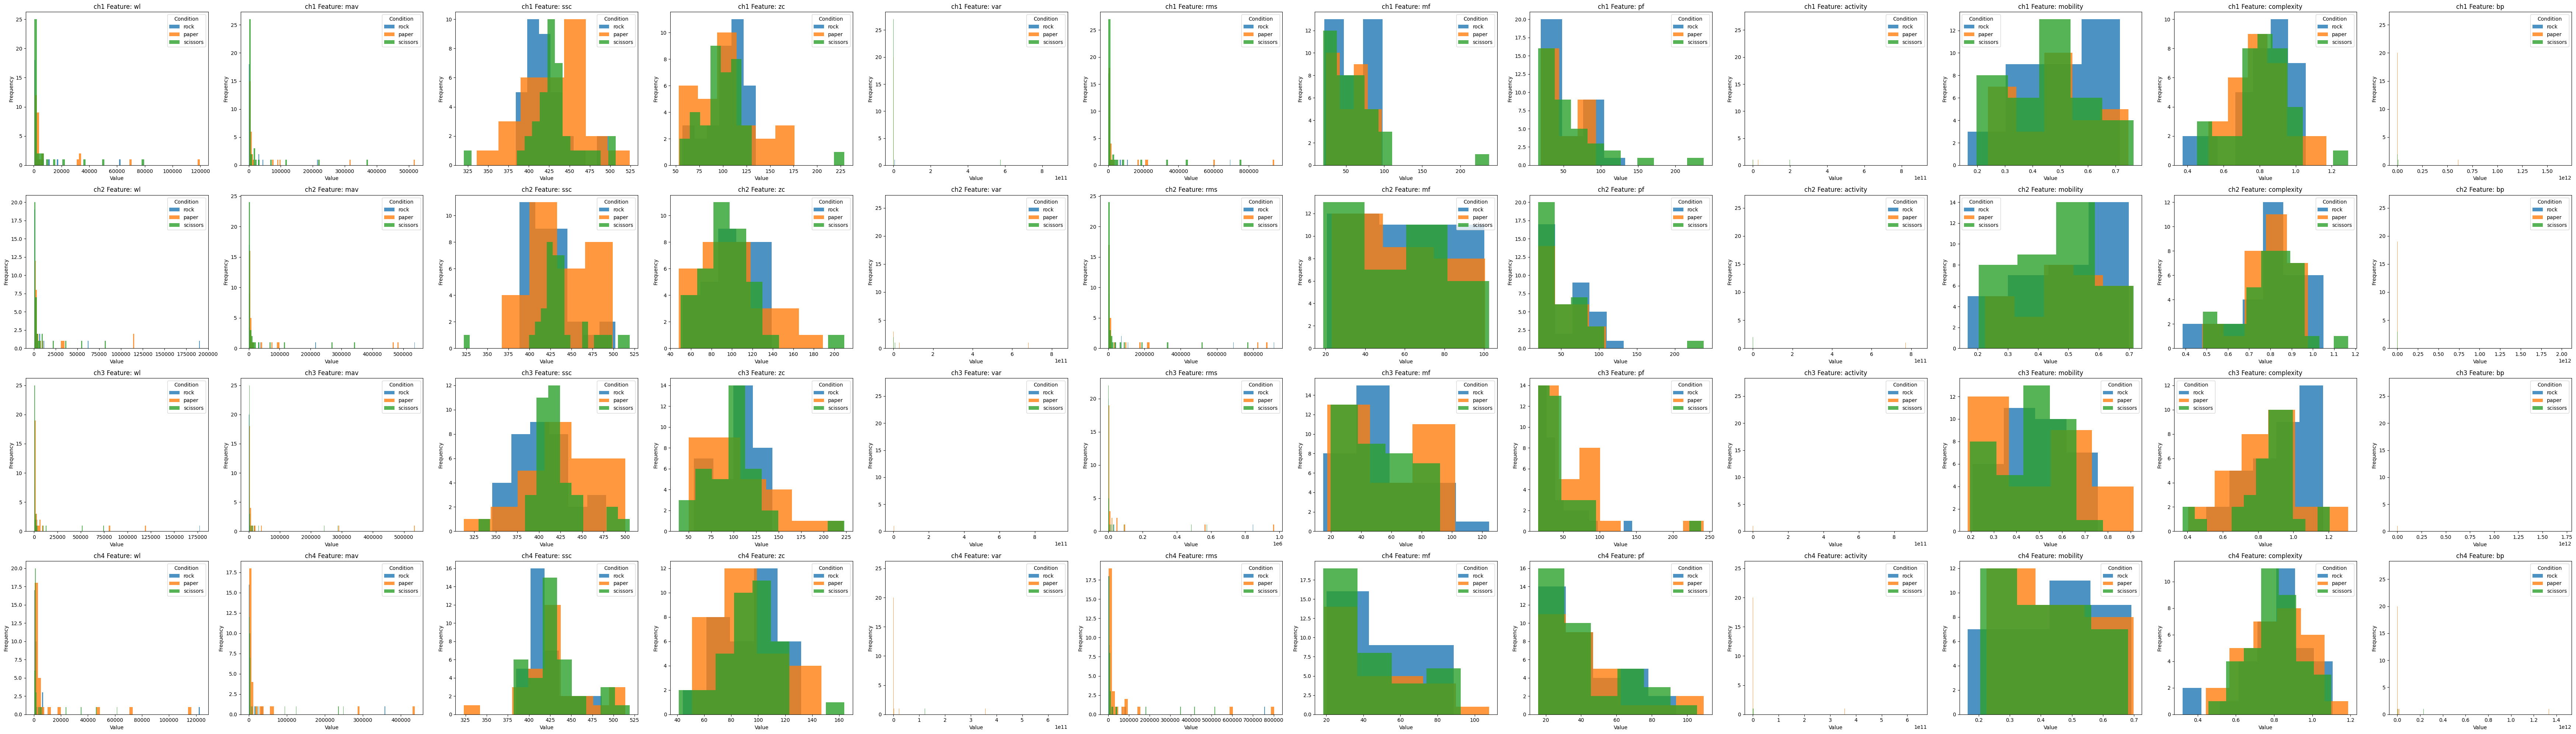

In [6]:
features = ['wl', 'mav', 'ssc', 'zc', 'var', 'rms','mf', 'pf', 'activity', 'mobility','complexity','bp']
channels = ['ch1', 'ch2', 'ch3', 'ch4']
fig, axs = plt.subplots(4, 12, figsize=(70, 20))

for i, ch in enumerate(channels):
    for j, feature in enumerate(features):
        col = f"{ch}_{feature}"
        ax = axs[i, j]  # Select the appropriate subplot
        
        # Plot histogram for each condition
        for label, group in df.groupby('label'):
            label_name = ['rock', 'paper', 'scissors'][label]  # Assumes Label values are 0, 1, 2
            ax.hist(group[col], bins="fd", alpha=0.8, label=label_name)
        
        # Add legend, labels, and title
        ax.legend(title='Condition')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{ch} Feature: {feature}')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig("feature_plots/all.png")

# Show the plot
plt.show()